In [29]:
import datetime
import pandas as pd
import numpy as np

from molecule_info import MoleculeInfo
from subspace_expansion import SubspaceExpansion
import h4_experiment

def timestamp():
    return datetime.datetime.now().strftime("%Y-%m-%d_%H:%M:%S")


In [19]:
params_fixed = {
    "n_trial": 10,
    "n_lev": "auto",
    "subspace": "1n",
    "spin_supspace": "up",
    "cpu_assigned": 10,
    "verbose": 1,
    "load": True,
    "write_result_matrix": True,
}
params_for_table = {}
results_for_table = {}
for molecule_label, n_qubit in [("H2", 4), ("H2", 8), ("LiH", 10)]:
    for method in ["naive_LBCS", "CS", "LBCS", "DCS", "OGM"]:
        for shots in [1000, 10000, 100000]:
            if (molecule_label, n_qubit) == ("H2", 4) and shots > 1000:
                continue
            param_key = (molecule_label, n_qubit, shots, method)
            print("\n", param_key)
            params_for_table[param_key] = {
                "molecule": molecule_label,
                "n_qubits": n_qubit,
                "shots": shots,
                "method": method,
                "suffix": timestamp(),
                **params_fixed,
            }
            if method == "OGM":
                params_for_table[param_key]["OGM_param_T"] = 1000
                
            molecule = MoleculeInfo(params_for_table[param_key])
            subspace_expansion = SubspaceExpansion(params_for_table[param_key], molecule)
            err, std = subspace_expansion.execute_statistics(molecule)
            results_for_table[param_key] = {"err": err, "std": std}


 ('H2', 4, 1000, 'naive_LBCS')
energy= -1.857275030202376
HF state |1010>
E excited  (linalg)       -1.2563390730032507
E excited (QSE w/o noise) -1.2563390730032502
energies_excited: 
 [-1.2452 -1.2619 -1.2539 -1.2007 -1.2678 -1.2575 -1.2383 -1.2226 -1.233
 -1.2406]

 ('H2', 4, 1000, 'CS')
energy= -1.8572750302023828
HF state |1010>
E excited  (linalg)       -1.2563390730032507
E excited (QSE w/o noise) -1.25633907300325
energies_excited: 
 [-1.2502 -1.218  -1.2938 -1.2318 -1.2753 -1.3033 -1.2699 -1.2911 -1.168
 -1.2865]

 ('H2', 4, 1000, 'LBCS')
energy= -1.8572750302023802
HF state |1010>
E excited  (linalg)       -1.2563390730032498
E excited (QSE w/o noise) -1.2563390730032504
energies_excited: 
 [-1.2563 -1.2563 -1.2563 -1.2563 -1.2563 -1.2563 -1.2563 -1.2563 -1.2563
 -1.2563]

 ('H2', 4, 1000, 'DCS')
energy= -1.8572750302023808
HF state |1010>
E excited  (linalg)       -1.2563390730032504
E excited (QSE w/o noise) -1.2563390730032504
energies_excited: 
 [-1.2563 -1.2563 -1.2563 

energies_excited: 
 [-7.6295 -7.5709 -7.5912 -7.5692 -7.5747 -7.5642 -7.5682 -7.5594 -7.5854
 -7.6178]

 ('LiH', 10, 100000, 'DCS')
energy= -7.916195287222164
HF state |1000010000>
E excited  (linalg)       -7.624378053765818
E excited (QSE w/o noise) -7.6243780537658115
energies_excited: 
 [-7.6054 -7.6188 -7.5995 -7.5861 -7.5959 -7.6002 -7.5821 -7.575  -7.5778
 -7.5751]

 ('LiH', 10, 1000, 'OGM')
energy= -7.9161952872221475
HF state |1000010000>
E excited  (linalg)       -7.6243780537658115
E excited (QSE w/o noise) -7.624378053765817
energies_excited: 
 [-7.674  -7.5719 -7.5982 -7.6269 -7.6027 -7.6085 -7.5503 -7.7479 -7.5864
 -7.5777]

 ('LiH', 10, 10000, 'OGM')
energy= -7.916195287222168
HF state |1000010000>
E excited  (linalg)       -7.624378053765817
E excited (QSE w/o noise) -7.624378053765811
energies_excited: 
 [-7.5874 -7.5903 -7.6503 -7.5848 -7.6256 -7.6308 -7.5781 -7.643  -7.6426
 -7.6126]

 ('LiH', 10, 100000, 'OGM')
energy= -7.916195287222192
HF state |1000010000>
E exci

In [24]:
df_dict = {}
df_dict["molecules"] = ["H2_4_qubit"] + ["H2_8_qubit"]*3 + ["LiH_10_qubit"]*3
df_dict["total_meas"] = [1000] + [1000, 10000, 100000]*2
for method in ["naive_LBCS", "CS", "LBCS", "DCS", "OGM"]:
    df_dict[f"{method}_err"] = [err_std_dict["err"] for label, err_std_dict in results_for_table.items() if method in label]
    df_dict[f"{method}_std"] = [err_std_dict["std"] for label, err_std_dict in results_for_table.items() if method in label]
df_plot = pd.DataFrame(df_dict)
df_plot

,molecules,total_meas,naive_LBCS_err,naive_LBCS_std,CS_err,CS_std,LBCS_err,LBCS_std,DCS_err,DCS_std,OGM_err,OGM_std
0,H2_4_qubit,1000,0.0178,0.0201,0.0339,0.0423,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
1,H2_8_qubit,1000,0.2249,0.2862,0.0652,0.0878,0.0860,0.1066,0.0365,0.0354,0.0606,0.0753
2,H2_8_qubit,10000,0.0674,0.0880,0.0284,0.0340,0.0327,0.0409,0.0198,0.0146,0.0284,0.0213
3,H2_8_qubit,100000,0.0200,0.0263,0.0187,0.0155,0.0175,0.0153,0.0218,0.0065,0.0179,0.0116
4,LiH_10_qubit,1000,0.6933,0.6788,0.2206,0.4185,0.1202,0.1282,0.0679,0.0735,0.0450,0.0577
5,LiH_10_qubit,10000,0.2526,0.2489,0.0601,0.0892,0.0361,0.0410,0.0424,0.0235,0.0239,0.0275
6,LiH_10_qubit,100000,0.0496,0.0525,0.0344,0.0312,0.0364,0.0222,0.0328,0.0147,0.0388,0.0122


In [31]:
df_plot.to_csv("reproduced_data.csv")

In [27]:
energies_rigorous, energies_2n1p_gs, energies_2n1p_cisd = h4_experiment.simulate_energy_vs_interatomic_distance()

100%|██████████| 40/40 [01:17<00:00,  1.93s/it]


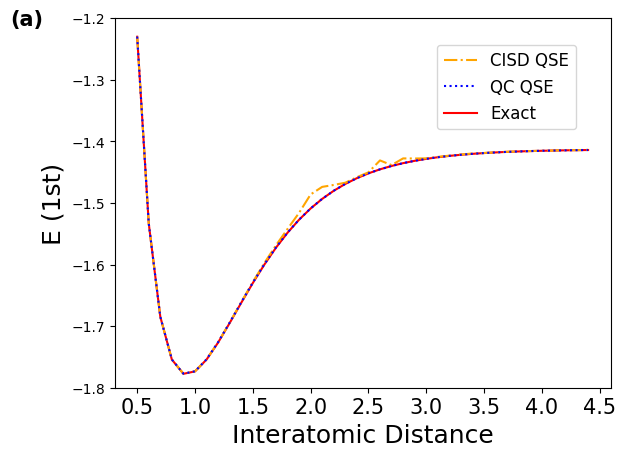

In [30]:
import matplotlib.pyplot as plt
plt.plot(np.arange(0.5, 4.5, 0.1),energies_2n1p_cisd, label="CISD QSE", color = "Orange", linestyle="-.", zorder=0)
plt.plot(np.arange(0.5, 4.5, 0.1),energies_2n1p_gs, label="QC QSE", color = "Blue", linestyle=":", zorder=1)
plt.plot(np.arange(0.5, 4.5, 0.1),energies_rigorous, label="Exact", color="red", zorder=-1)
plt.ylabel("E (1st)",fontsize=18)
plt.xlabel("Interatomic Distance",fontsize=18)
plt.ylim(-1.8, -1.2)
# plt.legend()
plt.legend(loc=(0.65, 0.7),fontsize=12)
plt.minorticks_off()
plt.xticks(fontsize=15)
plt.text(-0.6, -1.2116, '(a)', fontsize=15, weight='bold')
# plt.savefig("E_vs_distance.pdf",bbox_inches='tight')
plt.show()
